NOTICE: Run using conda environment with ezc3d installed

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
from ezc3d import c3d

In [11]:
# Rodar com os caminhos para os arquivos c3d
vj01c3dPath = './Vertical_jump0101.c3d'
vj02c3dPath = './Vertical_jump0102.c3d'
vj03c3dPath = './Vertical_jump0103.c3d'

In [90]:
# Função de leitura do c3d
def loadc3d(datc3d):
    datac3d = c3d(datc3d)
    point_data = datac3d['data']['points']
    analog_data = datac3d['data']['analogs']
    # Reshaping the analog data
    #reshaped_point_data = point_data.reshape(16,point_data.shape[2])
    reshaped_analog_data = analog_data.reshape(12,analog_data.shape[2])
    return point_data, reshaped_analog_data

In [91]:
# Salvando dados em variáveis
point1, analog1 = loadc3d(vj01c3dPath)
point2, analog2 = loadc3d(vj02c3dPath)
point3, analog3 = loadc3d(vj03c3dPath)

In [92]:
print('point1\'s shape: ',point1.shape)
print('analog1\'s shape: ',analog1.shape)
print('point2\'s shape: ',point2.shape)
print('analog2\'s shape: ',analog2.shape)
print('point3\'s shape: ',point3.shape)
print('analog3\'s shape: ',analog3.shape)

point1's shape:  (4, 16, 436)
analog1's shape:  (12, 4360)
point2's shape:  (4, 16, 571)
analog2's shape:  (12, 5710)
point3's shape:  (4, 16, 498)
analog3's shape:  (12, 4980)


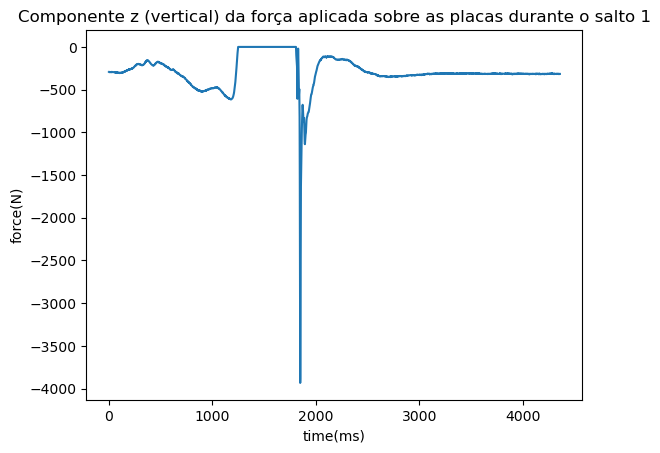

In [93]:
plt.plot(analog1[2])
plt.title('Componente z (vertical) da força aplicada sobre as placas durante o salto 1')
plt.xlabel('time(ms)')
plt.ylabel('force(N)')
plt.show();